In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import copy

In [2]:
df = pd.read_excel("../assets/data/data_ananye.xlsx")

In [3]:
df

,Date,Week,Type of Run,Training Block,Shoes,Distance,Time,PE,Average Pace,Average Speed,...,Cadence,Stride Length,GCT,Vertical Oscillation,Average Power,Running Efficiency [km/s],Running Efficiency [W],Unnamed: 19,2023-07-24 00:00:00,207
0,2024-05-21 00:00:00,NaN,Easy,Summer 2024,Invincible 3,3.55,1900-01-01 00:23:42,60.0,1970-01-01 01:00:00,NaN,...,170.0,0.8,231.0,8.7,144.0,NaN,NaN,NaN,NaT,NaN
1,2024-04-14 00:00:00,NaN,Race,R'dam Marathon 2024,Tempo Next%,42.34,1900-01-01 03:07:10,146.0,1970-01-01 01:00:00,NaN,...,176.0,1.2,219.0,8.1,216.0,NaN,NaN,NaN,NaT,NaN
2,2024-04-13 00:00:00,NaN,Neg. Split,R'dam Marathon 2024,Tempo Next%,3.69,1900-01-01 00:16:28,78.0,1970-01-01 01:00:00,NaN,...,178.0,1.2,203.0,8.1,210.0,NaN,NaN,NaN,NaT,NaN
3,2024-04-11 00:00:00,NaN,Tempo,R'dam Marathon 2024,Tempo Next%,4.65,1900-01-01 00:19:57,82.0,1970-01-01 01:00:00,NaN,...,181.0,1.2,199.0,8.0,220.0,NaN,NaN,NaN,2023-10-01,207.0
4,2024-04-09 00:00:00,NaN,Easy,R'dam Marathon 2024,Invincible 3,4.41,1900-01-01 00:23:09,69.0,1970-01-01 01:00:00,NaN,...,177.0,1.0,211.0,8.3,182.0,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2023-02-06 00:00:00,NaN,Neg. Split,R'dam Marathon 2023,Pegasus 38,13.03,1900-01-01 01:04:25,95.0,1970-01-01 01:00:00,NaN,...,172.0,1.0,226.0,8.4,192.0,NaN,NaN,NaN,NaT,NaN
159,2023-02-01 00:00:00,NaN,Easy,R'dam Marathon 2023,Adidas Flow,5.87,1900-01-01 00:30:18,74.0,1970-01-01 01:00:00,NaN,...,167.0,1.0,230.0,8.8,180.0,NaN,NaN,NaN,NaT,NaN
160,2022-11-25 00:00:00,NaN,Long,R'dam Marathon 2023,Pegasus 38,21.26,1900-01-01 01:55:54,92.0,1970-01-01 01:00:00,NaN,...,168.0,1.0,234.0,8.4,177.0,NaN,NaN,NaN,NaT,NaN
161,2022-11-13 00:00:00,NaN,Neg. Split,R'dam Marathon 2023,Pegasus 38,8.06,1900-01-01 00:38:53,86.0,1970-01-01 01:00:00,NaN,...,169.0,1.0,226.0,8.6,198.0,NaN,NaN,NaN,NaT,NaN


In [4]:
# useful columns
cols = ['Date', 'Type of Run', 'Shoes', 'Distance', 'Time', 'PE', 'Elevation Gain', 'AHR', 
        'Cadence', 'Stride Length', 'GCT ', 'Vertical Oscillation', 'Average Power']
# only keep useful columns
df = df[cols]

In [5]:
df.loc[:, 'Time'] = df['Time'].dt.time
df.loc[:, 'Time'] = df['Time'].apply(lambda x: pd.to_timedelta(f"{x.hour:02}:{x.minute:02}:{x.second:02}").total_seconds())

/var/folders/3m/47824pgj6rl3wf7k8lbrkm_m0000gn/T/ipykernel_26570/2053846917.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[datetime.time(0, 23, 42) datetime.time(3, 7, 10) datetime.time(0, 16, 28)
 datetime.time(0, 19, 57) datetime.time(0, 23, 9) datetime.time(0, 31, 56)
 datetime.time(0, 21, 37) datetime.time(0, 17, 44) datetime.time(0, 23, 3)
 datetime.time(1, 17, 57) datetime.time(0, 23, 43) datetime.time(0, 37, 1)
 datetime.time(0, 23, 43) datetime.time(0, 41, 37) datetime.time(0, 23, 2)
 datetime.time(0, 37, 15) datetime.time(1, 7, 16) datetime.time(0, 58, 14)
 datetime.time(0, 49, 46) datetime.time(0, 25, 56)
 datetime.time(0, 24, 20) datetime.time(0, 36, 4) datetime.time(0, 23, 12)
 datetime.time(1, 0, 21) datetime.time(0, 57, 23) datetime.time(1, 23, 35)
 datetime.time(0, 27, 50) datetime.time(0, 44) datetime.time(0, 27, 3)
 datetime.time(0, 37, 4) datetime.time(1, 1, 23) datetime.time(0, 26, 54)
 dat

In [6]:
# delete the last row
df = df.iloc[:-1]

In [7]:
df['Pace'] = df['Time'] / df['Distance'] / 60

In [8]:
df_original = copy.deepcopy(df)

In [9]:
# filter on pace >= 4.5
df_working = df_original[df_original['Pace'] >= 4.5]

In [10]:
# split dataset into two halves
df_1 = df_working.iloc[:len(df)//2]
df_2 = df_working.iloc[len(df)//2:]

In [11]:
# Regress heart rate on pace
X = df_1['Pace'].astype(float)
X = sm.add_constant(X)
y = df_1['AHR'].astype(float)

model_1 = sm.OLS(y, X).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AHR   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.78e-20
Time:                        14:58:48   Log-Likelihood:                -246.63
No. Observations:                  81   AIC:                             497.3
Df Residuals:                      79   BIC:                             502.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        234.4559      6.412     36.566      0.000     221.694     247.218
Pace         -14.4486      1.162    -12.432      0.000     -16.762     -12.135
==============================================================================
Omnibus:                        2.513   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.129
Skew:                           0.397   Prob(JB):                        0.345
Kurtosis:                       3.042   Cond. No.                         63.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# again
X = df_2['Pace'].astype(float)
X = sm.add_constant(X)
y = df_2['AHR'].astype(float)

model_2 = sm.OLS(y, X).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AHR   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     78.32
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.77e-12
Time:                        14:58:48   Log-Likelihood:                -197.38
No. Observations:                  62   AIC:                             398.8
Df Residuals:                      60   BIC:                             403.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        226.3816      7.510     30.145      0.000     211.360     241.403
Pace         -11.8699      1.341     -8.850      0.000     -14.553      -9.187
==============================================================================
Omnibus:                        1.076   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                1.008
Skew:                          -0.130   Prob(JB):                        0.604
Kurtosis:                       2.432   Cond. No.                         57.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

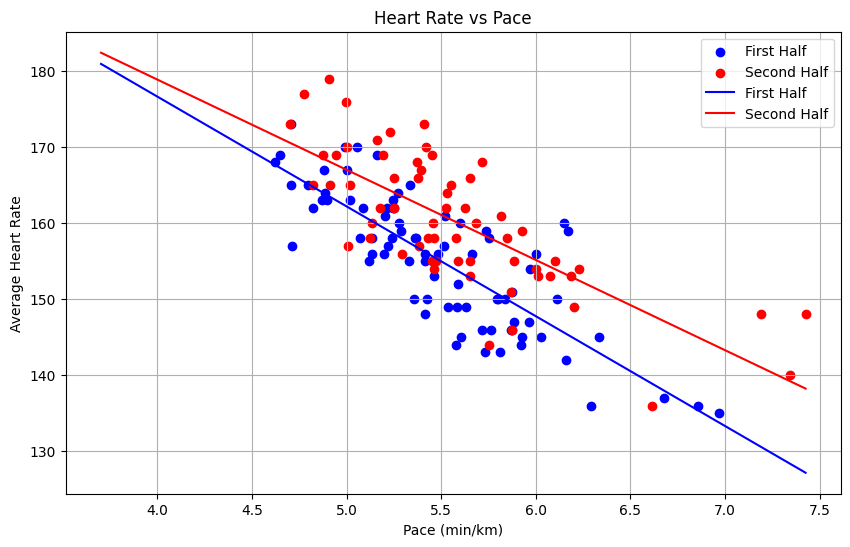

In [13]:
# plot heart rate against pace with regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df_1['Pace'], df_1['AHR'], color='blue', label='First Half')
plt.scatter(df_2['Pace'], df_2['AHR'], color='red', label='Second Half')
plt.xlabel('Pace (min/km)')
plt.ylabel('Average Heart Rate')
plt.title('Heart Rate vs Pace')
# plot the two regression lines
# find the minimum and the maximum pace
min = df['Pace'].min()
max = df['Pace'].max()
pace = np.linspace(min, max, 100)
ahr_1 = model_1.params['const'] + model_1.params['Pace'] * pace
plt.plot(pace, ahr_1, color='blue', label='First Half')
ahr_2 = model_2.params['const'] + model_2.params['Pace'] * pace
plt.plot(pace, ahr_2, color='red', label='Second Half')
plt.legend()
plt.grid()
plt.show()


In [14]:
copy_df = copy.deepcopy(df)

In [34]:
# in a rolling window, regress heart rate on pace
# then plot the intercepts and the slopes over time
intercepts = []
slopes = []
normalisation = 0
window = 3
for i in range(window, len(copy_df)):
    X = copy_df.iloc[i-window:i]['Pace'].astype(float)
    X = X - normalisation
    X = sm.add_constant(X)
    y = copy_df.iloc[i-window:i]['AHR'].astype(float)
    model = sm.OLS(y, X).fit()
    intercepts.append(model.params['const'])
    slopes.append(model.params['Pace'])

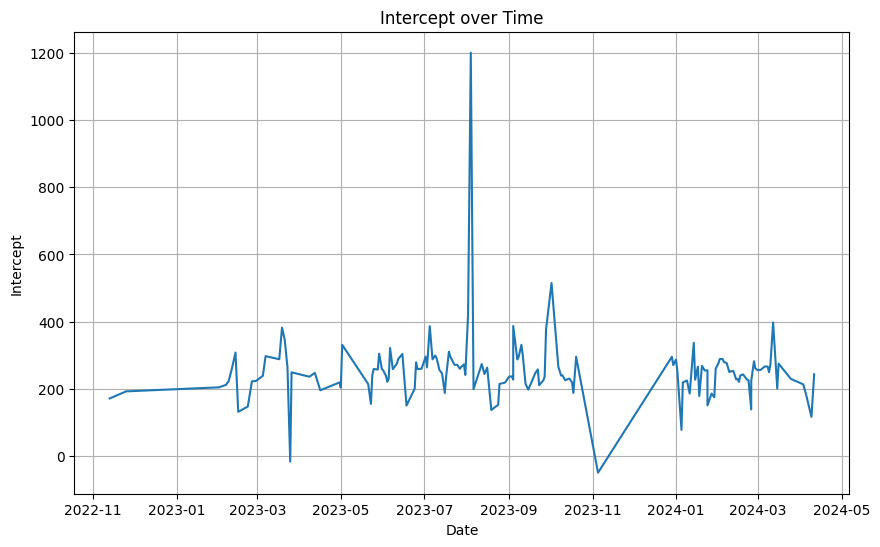

In [35]:
# plot the intercepts over time, use the date column from the df for the date axis
plt.figure(figsize=(10, 6))
plt.plot(copy_df.iloc[window:]['Date'], intercepts)
plt.xlabel('Date')
plt.ylabel('Intercept')
plt.title('Intercept over Time')
plt.grid()
plt.show()

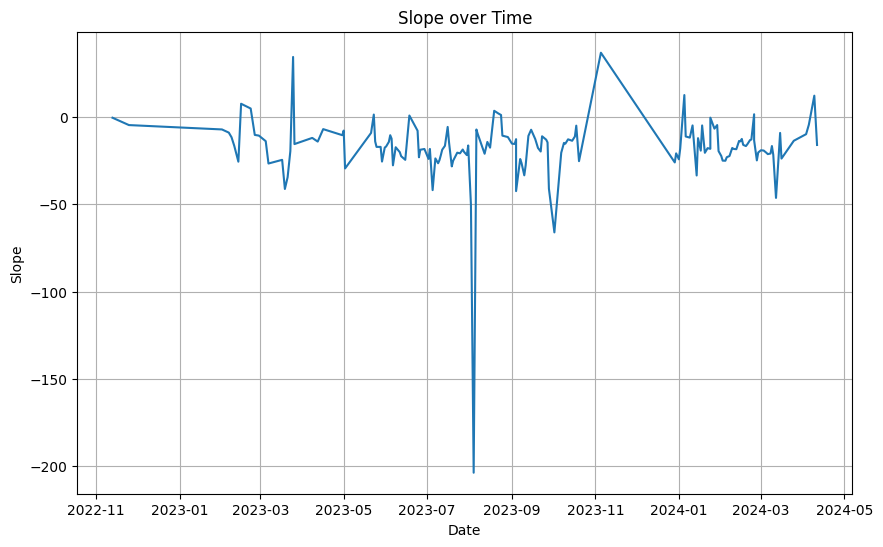

In [36]:
# do the same for the slopes
plt.figure(figsize=(10, 6))
plt.plot(copy_df.iloc[window:]['Date'], slopes)
plt.xlabel('Date')
plt.ylabel('Slope')
plt.title('Slope over Time')
plt.grid()
plt.show()
